In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Read the Airbnb Data
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
#we can't see all data so we use it to show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  float64
 12  cancellation_pol

In [5]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [6]:
#clean data
#neigbourdata was bookin instead of brooklyn
df[df['neighbourhood group']=='brookin']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [7]:
df["price"] = df["price"].astype(str).str.replace('$', '', regex=False)
df["service fee"] = df["service fee"].astype(str).str.replace('$', '', regex=False)

df["price"] = df["price"].str.replace(',', '', regex=False)
df["service fee"] = df["service fee"].str.replace(',', '', regex=False)


#Convert the price and service fee columns to include a dollar sign
df.rename(columns = {
    "price": "price_$",
    "service fee": "service_fee_$"
}, inplace = True)

#Drop all rows with missing values
df.dropna(thresh=5, inplace=True)  # Keeps rows with at least 5 non-NaN values


#Convert all data types to the appropriate ones.
df["price_$"] = df["price_$"].astype(float)
df["service_fee_$"] = df["service_fee_$"].astype(float)
df["last review"] = pd.to_datetime(df["last review"])
df["last review"] = df["last review"].dt.date
df["last review"] = pd.to_datetime(df["last review"])
df = df[df["Construction year"].notna()]
df["Construction year"] = df["Construction year"].astype(int)


#Correct the spelling of "Brooklyn"
df["neighbourhood group"] = df["neighbourhood group"].replace("brooklyn", "Brooklyn")
from scipy import stats
 

#Get rid of outliers in the "availability 365" column using zscore
df = df[df['availability 365'] > 0]
df = df.drop(df[df['availability 365'] > 900].index)
df = df[np.abs(stats.zscore(df["availability 365"])) < 3]
print(df.shape)  # Check how many rows remain after each step
print("After dropna:", df.shape)
print("After availability filter:", df.shape)
print("After z-score:", df.shape)



(78002, 26)
After dropna: (78002, 26)
After availability filter: (78002, 26)
After z-score: (78002, 26)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78002 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              78002 non-null  int64         
 1   NAME                            77816 non-null  object        
 2   host id                         78002 non-null  int64         
 3   host_identity_verified          77791 non-null  object        
 4   host name                       77763 non-null  object        
 5   neighbourhood group             77989 non-null  object        
 6   neighbourhood                   77987 non-null  object        
 7   lat                             77995 non-null  float64       
 8   long                            77995 non-null  float64       
 9   country                         77599 non-null  object        
 10  country code                    77904 non-null  object        
 11  instan

In [9]:
df.duplicated().value_counts()

False    77558
True       444
Name: count, dtype: int64

In [10]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,7.800200e+04,7.800200e+04,77995.000000,77995.000000,77920.000000,78002.000000,77821.000000,77812.000000,77669.000000,77902.000000,67682,67688.000000,77744.000000,77761.000000,78002.000000
mean,2.783175e+07,4.919134e+10,40.727806,-73.947999,0.495945,2012.492987,624.969134,124.959029,8.643384,32.488691,2019-08-29 16:08:21.261783040,1.590284,3.283687,9.749630,184.385285
min,1.001254e+06,1.297566e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,1.000000
25%,1.334883e+07,2.455121e+10,40.687790,-73.983030,0.000000,2008.000000,340.000000,68.000000,1.000000,2.000000,2019-04-19 00:00:00,0.310000,2.000000,1.000000,67.000000
50%,2.803338e+07,4.896960e+10,40.722740,-73.954010,0.000000,2012.000000,624.000000,125.000000,3.000000,10.000000,2019-06-22 00:00:00,1.000000,3.000000,1.000000,175.000000
75%,4.104350e+07,7.387393e+10,40.762940,-73.929750,1.000000,2018.000000,912.000000,182.000000,5.000000,40.000000,2019-07-07 00:00:00,2.370000,4.000000,3.000000,308.000000
max,5.736742e+07,9.876268e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,2645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000
std,1.614554e+07,2.851328e+10,0.057030,0.052574,0.499987,5.770901,331.217341,66.233350,24.388500,53.464031,NaN,1.851056,1.282841,36.290203,125.773986


In [11]:
property_types = df["room type"].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,41850
Private room,34285
Shared room,1771
Hotel room,96


In [12]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaT,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaT,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0,NaN,NaN


In [13]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


<Axes: xlabel='room type', ylabel='count'>

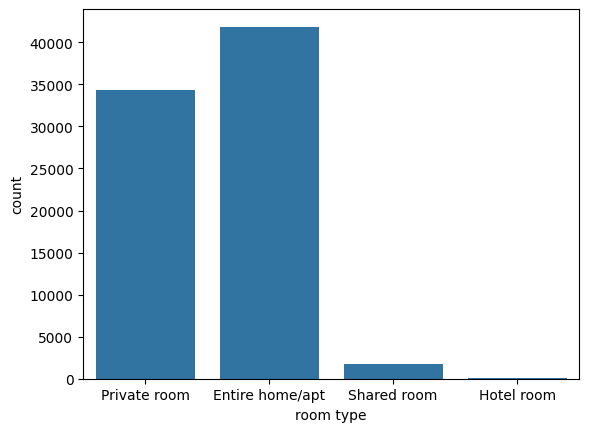

In [14]:
# See all rows with 'Private room'
df[df['room type'] == 'Private room']
#Number of rooms of each type 
# Count listings by room type
df['room type'].value_counts()

# Visualize room type distribution
import seaborn as sns
sns.countplot(data=df, x='room type')


In [16]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group


,count
neighbourhood group,
Manhattan,33185
Brooklyn,30689
Queens,10873
Bronx,2377
Staten Island,863
brookln,1
manhatan,1


Text(0, 0.5, 'Number of Listings')

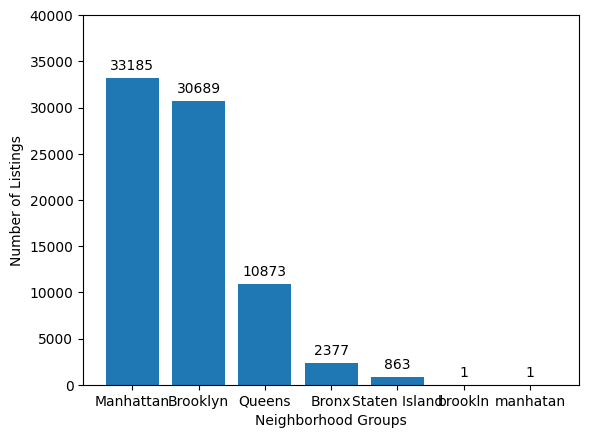

In [17]:
# Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, 'count'])
plt.bar_label(hood_group_bar, labels = hood_group.loc[:, 'count'], padding = 4)
plt.ylim(0, 40000)
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78002 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              78002 non-null  int64         
 1   NAME                            77816 non-null  object        
 2   host id                         78002 non-null  int64         
 3   host_identity_verified          77791 non-null  object        
 4   host name                       77763 non-null  object        
 5   neighbourhood group             77989 non-null  object        
 6   neighbourhood                   77987 non-null  object        
 7   lat                             77995 non-null  float64       
 8   long                            77995 non-null  float64       
 9   country                         77599 non-null  object        
 10  country code                    77904 non-null  object        
 11  instan

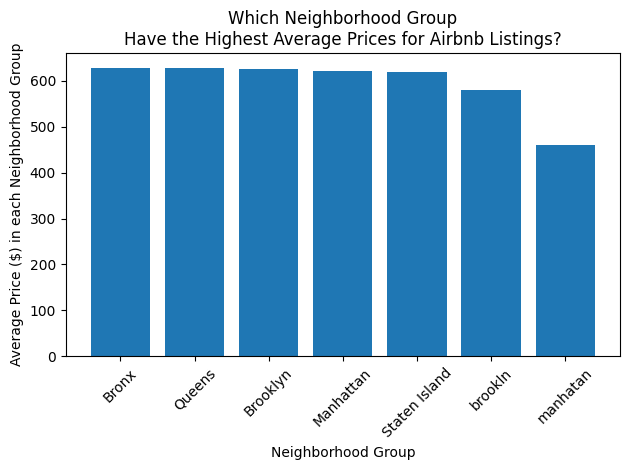

In [21]:
# Which neighborhoods group have the highest average prices for Airbnb listings?

avg_price = df.groupby("neighbourhood group")["price_$"].mean().sort_values(ascending = False).to_frame()
avg_price = avg_price.reset_index()
plt.bar(avg_price.index, avg_price["price_$"])
plt.xticks(avg_price.index, avg_price["neighbourhood group"], rotation = 45)
plt.title("Which Neighborhood Group\nHave the Highest Average Prices for Airbnb Listings?")
plt.xlabel("Neighborhood Group")
plt.ylabel("Average Price ($) in each Neighborhood Group")
plt.tight_layout()
plt.show()


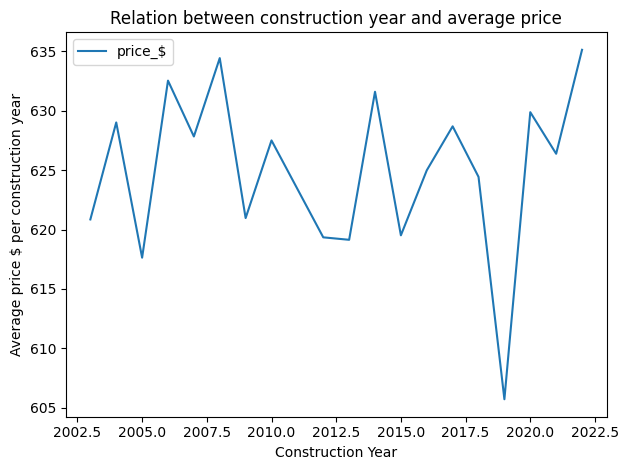

In [23]:
#Is there a relation between construction year and average price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.title('Relation between construction year and average price')
plt.xlabel('Construction Year')
plt.ylabel('Average price $ per construction year')
plt.tight_layout()

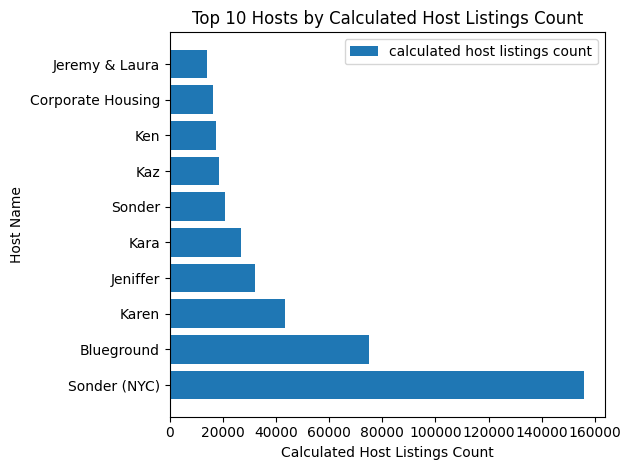

In [26]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts = hosts.reset_index()
hosts = hosts.sort_index(axis = 1)
plt.barh(hosts.index, hosts['calculated host listings count'], label = 'calculated host listings count')
plt.yticks(hosts.index, hosts['host name'])
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Host Name')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78002 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              78002 non-null  int64         
 1   NAME                            77816 non-null  object        
 2   host id                         78002 non-null  int64         
 3   host_identity_verified          77791 non-null  object        
 4   host name                       77763 non-null  object        
 5   neighbourhood group             77989 non-null  object        
 6   neighbourhood                   77987 non-null  object        
 7   lat                             77995 non-null  float64       
 8   long                            77995 non-null  float64       
 9   country                         77599 non-null  object        
 10  country code                    77904 non-null  object        
 11  instan

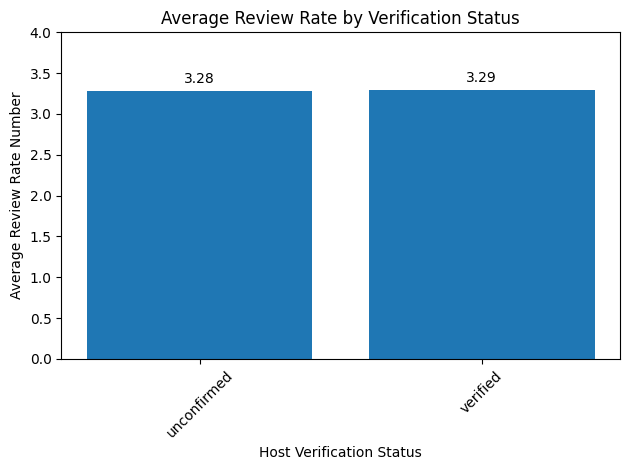

In [35]:
review = df.groupby('host_identity_verified')['review rate number'].mean().to_frame()
review = review.reset_index()

review_bar = plt.bar(review.index, review['review rate number'])
plt.bar_label(review_bar, labels=round(review['review rate number'], 2), padding=4)
plt.xticks(review.index, review['host_identity_verified'], rotation=45)
plt.ylim(0, 4)
plt.xlabel("Host Verification Status")
plt.ylabel("Average Review Rate Number")
plt.title("Average Review Rate by Verification Status")
plt.tight_layout()
plt.show()


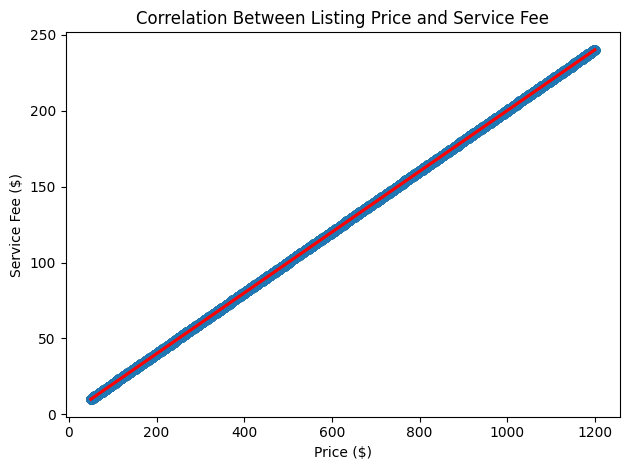

In [38]:
# Is there a correlation between the price of a listing and its service fee?
sns.regplot(x='price_$', y='service_fee_$', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Correlation Between Listing Price and Service Fee')
plt.tight_layout()
plt.show()


In [40]:
verified = df[df['host_identity_verified'] == 'verified']['review rate number']
unconfirmed = df[df['host_identity_verified'] == 'unconfirmed']['review rate number']

print("Verified mean:", verified.mean())
print("Unconfirmed mean:", unconfirmed.mean())


Verified mean: 3.2884223031429975
Unconfirmed mean: 3.2792746380918034


In [41]:
from scipy.stats import ttest_ind
ttest_result = ttest_ind(verified.dropna(), unconfirmed.dropna())
print("p-value:", ttest_result.pvalue)


p-value: 0.3207489053184028


Text(0.5, 1.0, 'Average Review Rate for each Verification Status')

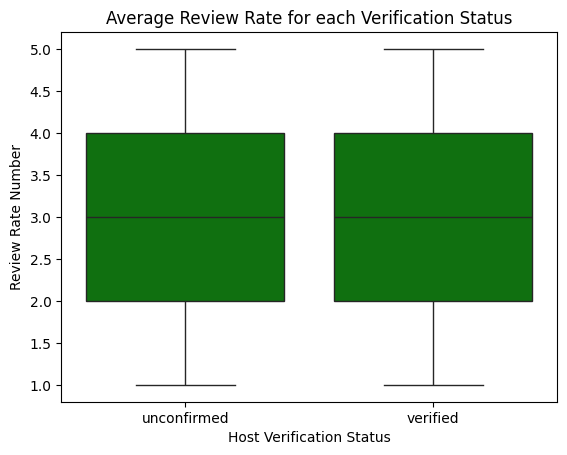

In [44]:
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color='green')
plt.xlabel("Host Verification Status")
plt.ylabel("Review Rate Number")
plt.title("Average Review Rate for each Verification Status")


In [47]:
# average rating
df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()


review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.351528
                    Private room               3.359941
                    Shared room                3.258065
Brooklyn            Entire home/apt            3.239329
                    Hotel room                 3.800000
                    Private room               3.271826
                    Shared room                3.354489
Manhattan           Entire home/apt            3.285233
                    Hotel room                 3.511905
                    Private room               3.279932
                    Shared room                3.277075
Queens              Entire home/apt            3.351744
                    Hotel room                 3.571429
                    Private room               3.318843
                    Shared room                3.411960
Staten Island       Entire home/apt            3.317536
                    Private room               3.471698
                    Shared room                3.307692
brookln             Private room               4.000000
manhatan            Private room               3.000000

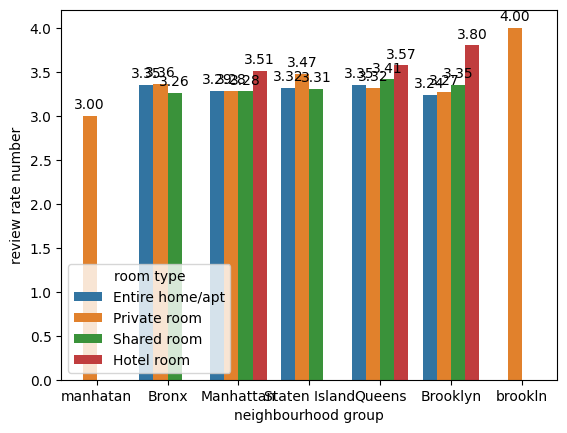

In [51]:
order = df_sorted['neighbourhood group'].drop_duplicates().tolist()
order = df_sorted.groupby('neighbourhood group')['review rate number'].mean().sort_values().index.tolist()
ax=sns.barplot(data=df_sorted, x='neighbourhood group', y='review rate number', hue='room type', order=order)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)



Text(0.5, 1.0, '# Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

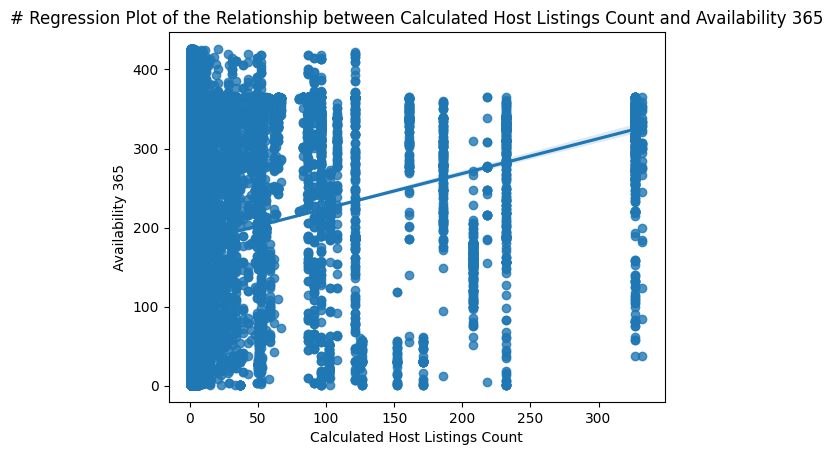

In [53]:
sns.regplot(x='calculated host listings count', y='availability 365', data=df)
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('# Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')


In [54]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.12754226250766107)